# Spectrogram Sharpening
In order to give our panoptic segmenation model the best chance of working, we must sharpen the spectrograms prior to training and similarly for prediction. This is to reduce the amount of noise in the spectrogram. Here, I will be using OpenCV2 to sharpen the images.

In [26]:
# basic imports
import os
import numpy as np
import cv2

We will be sharpening all of the images in the folder titled "GeneratedSpectrograms."

In [27]:
# saving the filepath to the spectrograms to sharpen
parentdir = os.path.abspath('..')
filepath = parentdir + "/SpectrogramPreprocessing/to_sharpen" 
filepath

'/home/sbaveja/reu-files/SpectrogramPreprocessing/to_sharpen'

In [28]:
spectrograms = []

for file in os.listdir(filepath):
    if file.endswith('.png'):
        spectrograms.append('/' + file)

We will now load and sharpen the image.

In [29]:
for s in spectrograms:
    unsharpened = cv2.imread(filepath + s, flags=cv2.IMREAD_COLOR)

In [30]:
type(unsharpened)


numpy.ndarray

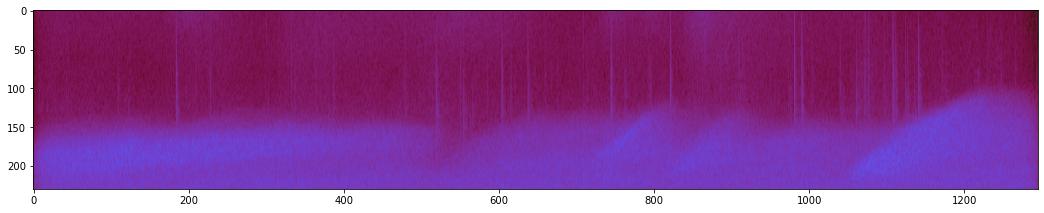

In [31]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(18, 16))
plt.imshow(unsharpened, interpolation='nearest')
plt.show()

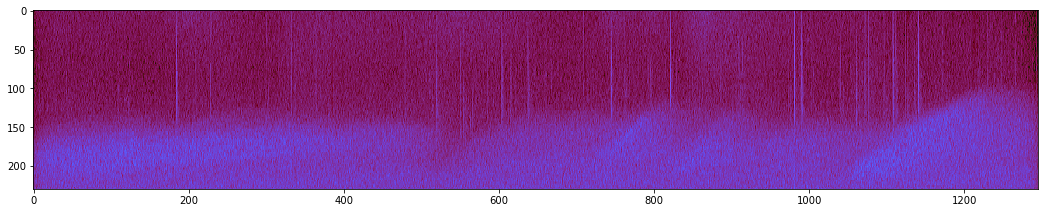

In [32]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

figure(figsize=(18, 16))
image_sharp = cv2.filter2D(src=unsharpened, ddepth=-1, kernel=kernel)
plt.imshow(image_sharp, interpolation='nearest')
plt.show()